# Reconstruction parcimonieuse ou compressive sensing

## I. Cadre général et première tentative.

Le but du TP est de montrer que des techniques d'optimisation pour le Machine Learning permettent de récupérer des signaux qui admettent dans une certaine base une représentation parcimonieuse, c'est à dire mettant en jeu un faible nombre de coefficients. 

On s'intéresse donc à la reconstruction d'un vecteur $x$ (ici une image codées en niveaux de gris) en utilisant les valeurs de combinaisons aléatoire de certains pixels. Les combinaisons sont représentées par une matrice $\Phi$. 

Une première approche consiste à résoudre le problème $$ \min_x \frac{1}{2} ||\Phi x-y||_2^2$$ pour retrouver l'image.

**Question 1 :** Commenter et compléter le code constituant le reste de la section I.


   Updating registry at `~/.julia/registries/General`


┌ Warning: Some registries failed to update:
│     — `~/.julia/registries/General` — registry dirty
└ @ Pkg.Types /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.4/Pkg/src/Types.jl:1131
  Resolving

 package versions...


   Updating `~/.julia/environments/v1.8/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.8/Manifest.toml`
 [no changes]


  Resolving package versions...


   Updating `~/.julia/environments/v1.8/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.8/Manifest.toml`
 [no changes]
  Resolving package versions...


   Updating `~/.julia/environments/v1.8/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.8/Manifest.toml`
 [no changes]
  Resolving package versions...


   Updating `~/.julia/environments/v1.8/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.8/Manifest.toml`
 [no changes]
  Resolving package versions...


   Updating `~/.julia/environments/v1.8/Project.toml`
 [no changes]
   Updating `~/.julia/environments/v1.8/Manifest.toml`
 [no changes]


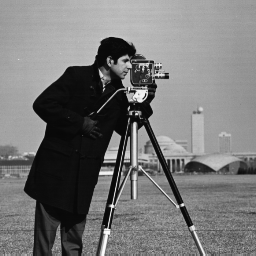

┌ Warning: _findmod is deprecated and will be removed. Use `Base.require(::Base.PkgId)` instead.
│   caller = (::ImageIO.var"#1#2"{Symbol})() at ImageIO.jl:17
└ @ ImageIO /home/jmoutahi/.julia/packages/ImageIO/uPn5K/src/ImageIO.jl:17


In [1]:
#
# Installation des librairies
#
using Pkg
Pkg.add("ImageMagick")
Pkg.add("Images")
Pkg.add("Colors")
Pkg.add("LinearAlgebra")
Pkg.add("FFTW")
#
#

#
# Repertoire ou se trouve le fichier cameraman.tif
#
#cd("$(homedir())/") 

#
# Chargement des librairies de traitement d'image
#
using Images, Colors, LinearAlgebra, FFTW


img1 = load("cameraman.tif");    # 
img=convert(Array{Gray},img1);   # 
A = (convert(Array{Float64},img));  # 

tmp=@view img1[:,:]

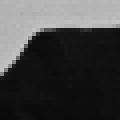

In [14]:
# Extraction d'une sous-image contrastée
k    = 30;
orig = 60;
Aloc   = A[orig:orig+k-1,orig:orig+k-1];
x   = (Aloc[:]);
n   = length(x);
m   = 500; 
Phi = randn(m,n);

imhsv=colorview(Gray,float(Aloc));
tmp=@view imhsv[:,:]

#
# Fin Extraction
#


**Question 2 :** Résoudre le problème de moindres carrés $$\min_x || \Phi x -y ||_2,$$ et afficher le résultat (attention, l'image doit être en niveaux de gris). Que constate-t-on?

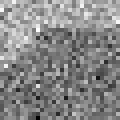

In [15]:
y     = Phi*x ; # Vecteur des "observations" de l'image
## A compléter

xres = pinv(Phi) *y;

(l,c) = size(Aloc);

xres = (1/(maximum(xres).-minimum(xres))).*(xres.-minimum(xres));

imres = reshape(xres, (l,c));

imhsv=colorview(Gray,float(imres));
tmp=@view imhsv[:,:]

## Fin à compléter

#### II. Compressive sensing


On désire utiliser à présent la transformation discrète en cosinus pour obtenir une représentaiton parcimonieuse d'une image. Cette transfomation bijective est obtenue avec la fonction `dct`, son inverse s'appelant `idct`.

A partir de la fonction IDCT de Julia, on calcule la matrice  $\Theta = \Phi*\Psi$, avec $\Psi$ la matrice représentative de IDCT dans la base canonique.


In [16]:
Theta = zeros(m,n);
for ii = 1:n
    ii
    ek = zeros(1,n);
    ek[ii] = 1;
    psi = idct(ek)';
    Theta[:,ii] = Phi*psi;
end

### II.1. Utilisation d'un algorithme de sous-gradient

**Qestion 3 :** Soit $\lambda > 0$ (ici $\lambda=100$). Expliquer l'intérêt de 
 calculer $x_{sg}= \Psi z$ où $z$ résout $$\min_z \frac{1}{2} ||\Phi  \cdot \Psi  \cdot z -y||_2^2+ \lambda ||z||_1.$$ 
 
**Qestion 4 :** Justifier la convexité de la fonctionnelle et donner son sous-différentiel.

**Qestion 5 :** Compléter ci-dessous le code de sous-gradient projeté. Vous considèrerez les différents choix de pas $\alpha_i$ vus en cours, et trouverez des réglages permettant d'obtenir un bon rendu visuel. On pourra se rappeler du fait que la solution de norme minimale a une norme inférieure à dix.


In [17]:
z = zeros(k^2,1); i=0; lambda=1e2;
choix_pas = 1; # 1 cas a, 2 cas b, 3 cas c

function f(x)
    return 1/2*(norm(Theta*x - y,2)^2) + lambda*norm(z,1)
end
    
while i <= 1000
    global i = i + 1; 
    ## A compléter
    sign = zeros(k^2,1);
    for jj in 1:(k^2)
        if z[jj] >= 0
            sign[jj] += 1;
        else
            sign[jj] -= 1;
        end
    end
    
    g = transpose(Theta)*Theta*z - transpose(Theta)*y + lambda*sign;
    #alpha = f(z)/(norm(g)^2)
    alpha = 1/(100*i);
    
    global z = z - alpha * g;
    
    ## fin à compléter
end

**Question 6 :** Expliquer le code suivant et conclure sur l'utilisation du sous-gradient

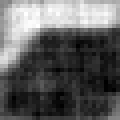

In [18]:
function my_function(n,k,z)
    x2 = zeros(n,1);
    for ii = 1:n
        ii
        ek = zeros(1,n);
        ek[ii] = 1;
        psi = idct(ek)';
        x2 = x2+psi*z[ii];
    end
    ## Calculer le gradient de la fonction à minimiser
    gradient = 2*Theta'*(Theta*z-y);
    x2 = reshape(x2,k,k);
    x2 = 1/(maximum(x2).-minimum(x2))*(x2.-minimum(x2));
    return x2
end
#
x2 = my_function(n,k,z);
imhsv = colorview(Gray, float(x2));
tmp=@view imhsv[:,:]

# II.2. Utilisation d'un algorithme de sous-gradient projeté


**Question 7 :**  Expliquer l'intérêt de 
 calculer $x_{sgp}= \Psi z$ où $z$ résout $$\min_{\Phi  \cdot \Psi  \cdot z =y}  ||z||_1.$$

- ici $x_{sgp}$ représente l'image de z dans la transformation IDCT, le calcul de z se fait dans la base de la représentation par cosinus, puis on revient dans la base canonique avec ce calcul. Le calcul de $\Psi x z$ est plus simple a faire et à inverser que le calcul direct de $\Phi x$.

**Question 8 :** Rappeler la formule de la projection sur le convexe $\{x, \Phi  \cdot \Psi  \cdot z =y \}$ vue en cours.

- La formule de la projection sur le convexe est : $z_{proj} = argmin_{z} ||z - z_{0}||_2^2$ avec $z_{0}$ le point de départ et $z$ le point projeté.

**Question 9 :** Résoudre ce problème par l'algorithme de sous-gradient projeté et finaliser le calcul de la solution.

In [19]:

z = zeros(k^2,1); 
i=0;
choix_pas = 1; # 1 cas a, 2 cas b, 3 cas c

##Initialisation (possible)
## A compléter

function projection(z)
    return z - (1/(norm(Theta)^2)).*Theta'*(Theta*z - y)
end 

## Fin à compléter

while i <= 1000
    global i = i + 1; 
    ## A compléter

    sign = zeros(k^2,1);
    for jj in 1:(k^2)
        if z[jj] >= 0
            sign[jj] += 1;
        else
            sign[jj] -= 1;
        end
    end
    
    alpha = 1/(100*i);
    global z = projection(z .- alpha*sign)
    ## fin à compléter
end

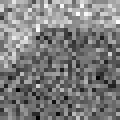

In [20]:
x3 = my_function(n,k,z);
imhsv = colorview(Gray,float(x3));
tmp =@view imhsv[:,:]